# PANDAS CAPSTONE PROJECT- SCHOOL SAFETY

![schoolsafety.png](schoolsafety.png)

* Since 1998, the New York City Police Department (NYPD) has been tasked with the collection and maintenance of crime data for incidents that occur in New York City public schools. For presentation purposes, each incident has been classified in one of three categories. These categories are:
<br>
**Major Crimes:** This category is consistent with those regularly and publicly reported by the NYPD. It includes the most serious personal and property crimes. The property crimes are burglary, grand larceny and grand larceny auto. The crimes against persons are murder, rape, robbery and felony assault.
<br>
**Other Crimes:** This category is composed of many crimes and incidents that range in severity. It includes reports of incidents such as arson/explosion, misdemeanor assault, criminal possession or sale of a controlled substance, sale of marijuana, criminal mischief, petit larceny, reckless endangerment, sex offenses (not including rape, which is included in the Major Crimes), and weapons possession.
<br>
**Non-Criminal Incidents:** This category includes actions which are not classified as crimes but are nevertheless disruptive to the school environment. It includes disorderly conduct, harassment, loitering, possession of marijuana, dangerous instruments and trespass.
<br>
NYPD and NYC Department of Education are stored this crime data as annualy school safety reports and published on https://www.data.gov/ . <br>
 __In this Data Analysis exercise, I concatenated the School Safety Reports of the 2015 and 2016, and I will try to Analyse this data.__ <br>


### IMPORTING LIBRARIES
* Import `numpy` as `np` and `pandas` as `pd`

In [40]:
import numpy as np
import pandas as pd   #EDA verileri kllanılabilir hale getirmek
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use("seaborn-darkgrid")

### STEP 1: EXAMINING DF 

#### IMPORTING DATA

* Import the school safety data and name it as:
    * 2015_16ss: `ss1516`
    * 2016_17ss: `ss1617`
* Don't forget to set `encoding="utf-8"` , `quotechar='"'`, and `delimiter=","`

In [41]:
#url="C:\\Users\\DELL\\2016_17ss.csv"
ss1516 = pd.read_csv("2015_16ss.csv",encoding="utf-8",quotechar='"',delimiter=",")
ss1617 = pd.read_csv("2016_17ss.csv",encoding="utf-8",quotechar='"',delimiter=",")

* Create `ss1517` by concating `ss1516` and `ss1617`
* Use `shape` to figure out how many rows and columns our `ss1517` has.

In [42]:
ss1517=pd.concat([ss1516,ss1617],join="inner",axis=0)
ss1517.shape

(4116, 20)

* Print the first 3 rows of `ss1517`

In [43]:
ss1517.head(5)
            

,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
0,P.S. 001 The Bergen,K001,K,15.0,1280.0,NaN,1.0,P.S. 001 The Bergen,0.0,1.0,0.0,1.0,0.0,7C,1251-1500,0.64,3.02,5.77,1.72,1.54
1,Parkside Preparatory Academy,K002,K,17.0,475.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,NaN,NaN,NaN,NaN,NaN,3C,251-500,NaN,NaN,NaN,NaN,NaN
2,EXPLORE CHARTER SCHOOL(BS),K704,K,17.0,529.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,NaN,NaN,NaN,NaN,NaN,4C,501-750,NaN,NaN,NaN,NaN,NaN
3,P.S. K141,K141,K,17.0,374.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,NaN,NaN,NaN,NaN,NaN,3C,251-500,NaN,NaN,NaN,NaN,NaN
4,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,K,17.0,1378.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,3.0,1.0,0.0,1.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82


#### Explanation of the Columns is needed to understand our analysis better <br>
* __Location Name__ is the the name by which the organization is known. For a learning community, it is the official title of the school. <br>
* __Location Code__ is a unique identifier that can include schools, administrative offices, learning communities, etc. <br>
* __Borough__ is the NYC Boro the location is situated in. <br>
* __Geographical District Code__ the school’s geographical district as defined by the NYC Department of Education. <br>
* __Register__ Number of students on register. <br>
* __Building Name__ is the the official name of the building a school is located in. <br>
* __# Schools__ is the number of schools in in the building. <br>
* __Schools in the Building__ is the names of the schools in the buildings. <br>
* __Major N__ is the number of major crimes. <br>
* __Oth N__ is the number of other crimes. <br>
* __NoCrim N__ is the number of non - criminal crimes. <br>
* __Prop N__ is the number of property crimes. <br>
* __Vio N__ is the number of violent crimes. <br>
* __EnGroup A__ is the building population. <br>
* __Range A__ is the group name the building population falls under. <br>
* __AvgofMajorN__ is the average of major crimes for all buildings that have the same EnGroupA/Range A. <br>
* __AvgofOthN__ is the average of other crimes for all buildings that have the same EnGroupA/Range A. <br>
* __AvgofNoCrimN__ is the average of non-criminal crimes for all buildings that have the same EnGroupA/Range A. <br>
* __AvgofPropN__ is the average of property crimes for all buildings that have the same EnGroupA/Range A. <br>
* __AvgofVioN__ is the average of violent crimes for all buildings that have the same EnGroupA/Range A. <br>
---
Let's take a breif look of our data.

* Use `.info()` to get summary information about the `ss1517`

In [44]:
ss1517.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116 entries, 0 to 2045
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location Name               4115 non-null   object 
 1   Location Code               3790 non-null   object 
 2   Borough                     4113 non-null   object 
 3   Geographical District Code  4112 non-null   float64
 4   Register                    4046 non-null   float64
 5   Building Name               2373 non-null   object 
 6   # Schools                   4115 non-null   float64
 7   Schools in Building         4115 non-null   object 
 8   Major N                     2401 non-null   float64
 9   Oth N                       2401 non-null   float64
 10  NoCrim N                    2401 non-null   float64
 11  Prop N                      2401 non-null   float64
 12  Vio N                       2401 non-null   float64
 13  ENGroupA                    4073 

While 7 of our column's dtpyes are object, 13 of them's dtypes are float.
___

Let's examine the summary statistics of our ss1517 df:

* Use `.describe()` to receive summary statistics about `ss1517`

In [45]:
ss1517.describe()

,Geographical District Code,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
count,4112.000000,4046.000000,4115.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2400.000000,2400.000000,2399.000000,2399.000000,2400.000000
mean,15.419018,687.297084,2.170595,0.426489,1.746772,3.489379,1.052895,0.875052,0.438704,1.836046,3.384894,1.120796,0.879746
std,9.221523,547.373869,1.452559,0.873994,2.849710,7.013974,1.750748,1.689985,0.347415,1.669645,4.018752,0.898922,0.761603
min,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.710000,1.670000,0.510000,0.320000
25%,8.000000,354.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270000,0.900000,1.710000,0.630000,0.440000
50%,14.000000,529.500000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.280000,1.110000,1.740000,0.750000,0.530000
75%,24.000000,850.000000,3.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.570000,2.120000,3.640000,1.390000,1.050000
max,32.000000,5682.000000,8.000000,8.000000,25.000000,88.000000,16.000000,13.000000,3.140000,13.000000,34.860000,8.290000,5.290000


### STEP 2: LOCATING & REMOVING NA VALUES

Let's check whether our df has Na values or not:
* Use `isnull().values.any()` for this purpose

In [46]:
ss1517.isnull().values.any()       # Çok kllanılacak komut

True

Appearently, we have some Na values. Let's figure out how many Na values we have:

* Use `isnull().values.sum()` to see how many NA values we have in `ss1517`

In [47]:
ss1517.isnull().values.sum()

19392

19392 of our values are Na. Wow!, that's a lot. In that case, we have 3 options: 
<br>
1) We can get rid of them with `ss1517.dropna()` . We can do this but we also loose a lot of useful information because `.dropna()`__drops entire column that has Na value__ , and not every value in that column is Na. That's why we won't go with dropna().
<br>
2) We can use the `value` parameter of the `fillna()` function. In that case, we can only replace Na 's with one variable. If we try to replace them with int or float, we 'll also replace the Na values in the object columns, and the reverse is also applicable. It seems little messy. <br>
3) We can use the `method`parameter of the `fillna()`function. We can set `method='ffill'`to replace Na values with the last valid observation, or we can set `method = 'bfill'`to replace Na values with the next valid observation. If we first set `method = 'ffill'`and then set `method = 'bfill'`, we can remove all Na values with the same dtype of columns. That way we are able to protect our dataframe's structure. That's why we'll go with this option. 

* Fill the NA values or drop them with the relevant method(s). Briefly explain why do you choose the particular method or why don't you choose the others..

In [48]:
ss1517.fillna(method='ffill',inplace= True)

In [49]:
ss1517.fillna(method='bfill',inplace= True)

Na values check, once more..

* Recheck whether you have NA values in `ss1517` or not with `isnull().values.any()`

In [50]:
ss1517.isnull().values.any()
#ss1517.isnull().values.sum()

False

* Take a look at your data with `.info()` and evaluate your data within `ss1517`

Great ! We don't have any Na values. 
___

Let's check whether we made any changes after we implement `fillna()`
* Use `info` for that purpose

In [51]:
ss1517.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116 entries, 0 to 2045
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location Name               4116 non-null   object 
 1   Location Code               4116 non-null   object 
 2   Borough                     4116 non-null   object 
 3   Geographical District Code  4116 non-null   float64
 4   Register                    4116 non-null   float64
 5   Building Name               4116 non-null   object 
 6   # Schools                   4116 non-null   float64
 7   Schools in Building         4116 non-null   object 
 8   Major N                     4116 non-null   float64
 9   Oth N                       4116 non-null   float64
 10  NoCrim N                    4116 non-null   float64
 11  Prop N                      4116 non-null   float64
 12  Vio N                       4116 non-null   float64
 13  ENGroupA                    4116 

Great ! Everything seems to be in order.
* Print the first 3 rows of your df.

In [52]:
ss1517.head(3)

,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
0,P.S. 001 The Bergen,K001,K,15.0,1280.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,P.S. 001 The Bergen,0.0,1.0,0.0,1.0,0.0,7C,1251-1500,0.64,3.02,5.77,1.72,1.54
1,Parkside Preparatory Academy,K002,K,17.0,475.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,3C,251-500,0.64,3.02,5.77,1.72,1.54
2,EXPLORE CHARTER SCHOOL(BS),K704,K,17.0,529.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,4C,501-750,0.64,3.02,5.77,1.72,1.54


In [53]:
ss1517.describe()

,Geographical District Code,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,15.413022,691.461856,2.170311,0.509718,2.030369,4.109329,1.236880,1.023567,0.466652,1.990258,3.737604,1.197869,0.947461
std,9.219450,559.116512,1.452497,0.981061,3.194893,8.207409,1.986347,1.884690,0.402852,1.934338,4.691680,1.038761,0.875348
min,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.710000,1.670000,0.510000,0.320000
25%,8.000000,353.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270000,0.900000,1.710000,0.630000,0.440000
50%,14.000000,528.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.280000,1.110000,1.740000,0.750000,0.530000
75%,24.000000,851.000000,3.000000,1.000000,3.000000,4.000000,2.000000,1.000000,0.570000,2.120000,3.640000,1.390000,1.050000
max,32.000000,5682.000000,8.000000,8.000000,25.000000,88.000000,16.000000,13.000000,3.140000,13.000000,34.860000,8.290000,5.290000


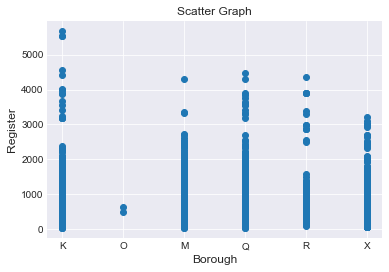

In [54]:
x1 = ss1517.iloc[:,2]
y1 = ss1517.iloc[:,4]
plt.scatter(x1, y1)
plt.xlabel("Borough", fontsize = 12)
plt.ylabel("Register", fontsize = 12)
plt.title("Scatter Graph")
plt.show()

How beautiful does our data sets look like without Na values..

### STEP 3: ANALYSING DATA

__In this dataset, major crimes are coded like this:__<br>
Burglary - 0<br>
Grand larceny - 1<br>
Grand larceny auto - 2<br>
Murder - 3<br>
Rape - 4 <br>
Robbery - 5<br>
Felony - 6<br>
Assault - 8<br>
___
Let's check it out that how is major crimes' distribution in the number of Major Crimes , a.k.a. `Major N`
* For that purpose, you can use `unique()` method.
* Name your result as `avgmajor`

In [55]:
avgmajor=ss1517["Major N"].unique()
avgmajor

array([0., 3., 1., 2., 4., 6., 5., 8.])

In [56]:
avgmajor=ss1517.groupby(["Major N"]).count()
avgmajor.iloc[:,0]


Major N
0.0    2906
1.0     700
2.0     279
3.0     125
4.0      74
5.0      25
6.0       6
8.0       1
Name: Location Name, dtype: int64

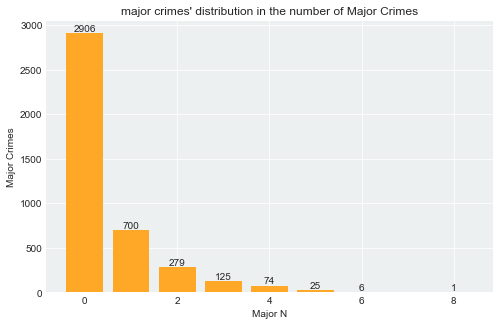

In [57]:
y = avgmajor.iloc[:,0]
x= avgmajor.index
score = np.arange(20, 110, 10)
plt.figure(figsize= (8, 5)) # setting up figure size
ax = plt.axes()
ax.set_facecolor("#ECF0F1") # setting the bacground color by specifying the HEX code
plt.bar(x, y, color = "#FFA726")
plt.xlabel("Major N")
plt.ylabel("Major Crimes")

for i, j in zip(x, y):
    plt.text(i, j, "%d" % j, ha= "center", va = "bottom")

plt.title("major crimes' distribution in the number of Major Crimes")
plt.show()

Though we have 7 different crimes, Burglary(0) and Grand Larcery(1) are so dominant that other crimes couldn't show themselves on the `Major N` .This explanation will be understood better once we plot our `Major N`(Number of Major Crimes) column.
___

Let's separate these two and dive deeper. and name it as `bigtwo` <br>
Hint: You can use the following structure: `df[df["Column"] <= yourfilter]`

### BIG TWO

In [58]:
bigtwo = ss1517[ss1517["Major N"] <= 1]

Let's examine our big two.
* Start with `shape`, then proceed with `info()`
* You can also print the first five columns for that purpose.

In [59]:
bigtwo.shape

(3606, 20)

In [60]:
bigtwo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3606 entries, 0 to 2045
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location Name               3606 non-null   object 
 1   Location Code               3606 non-null   object 
 2   Borough                     3606 non-null   object 
 3   Geographical District Code  3606 non-null   float64
 4   Register                    3606 non-null   float64
 5   Building Name               3606 non-null   object 
 6   # Schools                   3606 non-null   float64
 7   Schools in Building         3606 non-null   object 
 8   Major N                     3606 non-null   float64
 9   Oth N                       3606 non-null   float64
 10  NoCrim N                    3606 non-null   float64
 11  Prop N                      3606 non-null   float64
 12  Vio N                       3606 non-null   float64
 13  ENGroupA                    3606 

In [61]:
bigtwo.head()

,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
0,P.S. 001 The Bergen,K001,K,15.0,1280.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,P.S. 001 The Bergen,0.0,1.0,0.0,1.0,0.0,7C,1251-1500,0.64,3.02,5.77,1.72,1.54
1,Parkside Preparatory Academy,K002,K,17.0,475.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,3C,251-500,0.64,3.02,5.77,1.72,1.54
2,EXPLORE CHARTER SCHOOL(BS),K704,K,17.0,529.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,4C,501-750,0.64,3.02,5.77,1.72,1.54
3,P.S. K141,K141,K,17.0,374.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,3C,251-500,0.64,3.02,5.77,1.72,1.54
4,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,K141,K,17.0,1378.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,3.0,1.0,0.0,1.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82


There might be relevance between the tow big crimes and the Borough that they are commited. 
___
* To figure out relevance, we need to know our Borough values. Let's find the unique values in Borough column by `unique()`function. <br>
* Use `unique()` and return the unique values of `Borough` column of `bigtwo`


In [62]:
bigtwo['Borough'].unique()

array(['K', 'O', 'M', 'Q', 'R', 'X'], dtype=object)

In that case : <br>
__M__ represents Manhattan. <br>
__Q__ represents Queens. <br>
__R__ represents Rikers Island. <br>
__K__ represents Brooklyn. <br>
__X__ represents The Bronx. <br>
__O__ represents Staten Island. <br>

* Now, as we know Borough's and their actual names, we can examine the relationship between the bigtwo and Boroughs. We can do this through grouping them by Borough's. In that case, the most handy tool is  `groupby()`function.
* Use `groupby()` and group `bigtwo` by it's `Borough`

In [63]:
bigtwo.groupby("Borough")["Major N"].sum()

Borough
K    233.0
M    161.0
O      0.0
Q     87.0
R     18.0
X    201.0
Name: Major N, dtype: float64

In [64]:
labels=bigtwo.groupby("Borough")["Major N"].sum().index
area = bigtwo.groupby("Borough")["Major N"].sum()
area.values

array([233., 161.,   0.,  87.,  18., 201.])

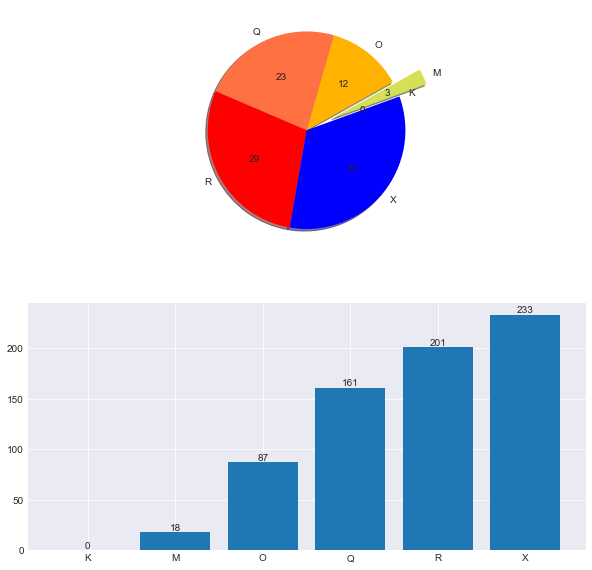

In [65]:
labels=bigtwo.groupby("Borough")["Major N"].sum().index
area = bigtwo.groupby("Borough")["Major N"].sum()
area=sorted(area.values)
#area=[233., 161.,   0.,  87.,  18., 201.]
plt.figure(figsize= (10, 10))
colors = ["#8BC34A", "#D4E157", "#FFB300", "#FF7043","red","blue"]
plt.subplot(2 , 1, 1)
plt.pie(area, labels = labels, colors = colors, startangle = 20, shadow = True, autopct = "%.0f", explode = [0 ,0.3 , 0, 0,0,0])

#
plt.subplot(2, 1, 2)
#area=sorted([233., 161.,   0.,  87.,  18., 201.])
plt.bar(labels, area)

for i, j in zip(labels, area):
    plt.text(i, j, "%d" % j, ha= "center", va = "bottom")
    
plt.show()




* Evaluate the result **with your own words**. Remember, Data Science is all about explaining the story of the data. So, try your best and seeze the story behind the data..

Well, it seems that burglary and grand larceny crimes are commited in Brooklyn first place, then the Bronx, then Manhattan. We can say that burglary and grand larceny crimes in NYC Public Schools are not relevant with the wealth because the richest borough of the NYC is Manhattan; and there are more burglary and grand larceny crimes commited in Manhattan than the poorest Borough in NYC, the Bronx.
___
Hmm, how about adding a new variable in our equasion and looking from different perspective ? <br>
Let's examine our big two by the Borough's and the number of students in each schools, a.k.a. `Register` <br>
That way, we can evaluate our bigtwo not only with Borough's and the wealth of them, but also with the population's of Borough's and their effects on burglary and grand larceny.
___


Now, we can say that there are much more grand larceny crime is commited than burglary in Manhattan. For other Borough's , everything is pretty much same. 

### OTHER MAJOR CRIMES

Now, it is time to talk about the other major crimes : <br>
Grand larceny auto - 2<br>
Murder - 3<br>
Rape - 4 <br>
Robbery - 5<br>
Felony - 6<br>
Assault - 8<br>
___
As they did not occur as frequent as the burglary and the grand larceny, their contest is much more serious than bigtwo. Let's create a new dataframe and name it as `othercrimes`:
* Hint: You can use the following structure: `df[df["Column"] <= yourfilter]`

In [66]:
othercrimes=ss1517[ss1517["Major N"] > 1]
othercrimes

,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
9,P.S. 008 Robert Fulton,K008,K,13.0,924.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,P.S. 008 Robert Fulton,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
10,P.S. 009 Teunis G. Bergen,K009,K,13.0,838.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
11,BROOKLYN EAST COLLEGIATE CHARTER SCHOOL(BN),K780,K,13.0,388.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,3C,251-500,0.38,1.71,2.38,0.98,0.82
69,272 MACDONOUGH STREET CONSOLIDATED LOCATION,K628,K,16.0,390.0,272 MACDONOUGH STREET CONSOLIDATED LOCATION,2.0,Brooklyn Brownstone School | M.S. 035 Stephen...,2.0,0.0,1.0,1.0,1.0,3C,251-500,0.27,0.90,1.67,0.63,0.44
74,265 RALPH AVENUE CONSOLIDATED LOCATION,K594,K,16.0,493.0,265 RALPH AVENUE CONSOLIDATED LOCATION,2.0,P.S. 040 George W. Carver | Gotham Profession...,2.0,2.0,1.0,3.0,1.0,3C,251-500,0.27,0.90,1.67,0.63,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Eagle Academy for Young Men,X231,X,9.0,2023.0,750 BAYCHESTER AVENUE CONSOLIDATED LOCATION,2.0,Bronx Health Sciences High School | Harry S T...,2.0,10.0,10.0,2.0,8.0,10C,2001-2500,0.57,2.12,3.64,1.39,1.05
2012,Bronx Leadership Academy II High School,X527,X,7.0,508.0,3450 EAST TREMONT AVENUE CONSOLIDATED LOCATION,1.0,P.S. 723,2.0,0.0,1.0,0.0,2.0,4C,501-750,0.28,1.11,1.74,0.75,0.53
2022,High School for Energy and Technology,X565,X,10.0,1173.0,455 SOUTHERN BLVD CONSOLIDATED LOCATION,3.0,"H.E.R.O. High (Health, Education, and Research...",3.0,7.0,6.0,4.0,6.0,6C,1001-1250,0.57,2.12,3.64,1.39,1.05
2027,Antonia Pantoja Preparatory Academy: A College...,X376,X,8.0,2979.0,1550 CROTONA PARK EAST CONSOLIDATED LOCATION,1.0,Bronx High School of Science,2.0,5.0,6.0,4.0,2.0,11C,2501-3000,3.14,13.00,34.86,8.29,5.29


Let's examine the other crimes: 
* Start with `shape`, then proceed with `info()`
* You can also print the first five columns for that purpose.

In [67]:
othercrimes.shape


(510, 20)

In [68]:
othercrimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 9 to 2031
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location Name               510 non-null    object 
 1   Location Code               510 non-null    object 
 2   Borough                     510 non-null    object 
 3   Geographical District Code  510 non-null    float64
 4   Register                    510 non-null    float64
 5   Building Name               510 non-null    object 
 6   # Schools                   510 non-null    float64
 7   Schools in Building         510 non-null    object 
 8   Major N                     510 non-null    float64
 9   Oth N                       510 non-null    float64
 10  NoCrim N                    510 non-null    float64
 11  Prop N                      510 non-null    float64
 12  Vio N                       510 non-null    float64
 13  ENGroupA                    510 no

* Print the first 3 rows of `othercrimes` df. 

In [69]:
othercrimes.head(3)

,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
9,P.S. 008 Robert Fulton,K008,K,13.0,924.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,P.S. 008 Robert Fulton,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
10,P.S. 009 Teunis G. Bergen,K009,K,13.0,838.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
11,BROOKLYN EAST COLLEGIATE CHARTER SCHOOL(BN),K780,K,13.0,388.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,3C,251-500,0.38,1.71,2.38,0.98,0.82


It seems that we won't use some of the columns in our dataset. Let's get rid of them. <br>
We can do this by `drop()`function of Pandas. With `drop`we can drop columns.
___
* After careful review, your team lead thinks that `Location Code` column is unnecessary for our analysis.
* Drop the `Location Code` column from `othercrimes` df.
* After that, print the first 5 rows to check whether `Location Code` is dropped or not. 

In [70]:
othercrimes=othercrimes.drop(columns=["Location Code"],axis=1)
othercrimes.head()

,Location Name,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
9,P.S. 008 Robert Fulton,K,13.0,924.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,P.S. 008 Robert Fulton,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
10,P.S. 009 Teunis G. Bergen,K,13.0,838.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
11,BROOKLYN EAST COLLEGIATE CHARTER SCHOOL(BN),K,13.0,388.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,3C,251-500,0.38,1.71,2.38,0.98,0.82
69,272 MACDONOUGH STREET CONSOLIDATED LOCATION,K,16.0,390.0,272 MACDONOUGH STREET CONSOLIDATED LOCATION,2.0,Brooklyn Brownstone School | M.S. 035 Stephen...,2.0,0.0,1.0,1.0,1.0,3C,251-500,0.27,0.90,1.67,0.63,0.44
74,265 RALPH AVENUE CONSOLIDATED LOCATION,K,16.0,493.0,265 RALPH AVENUE CONSOLIDATED LOCATION,2.0,P.S. 040 George W. Carver | Gotham Profession...,2.0,2.0,1.0,3.0,1.0,3C,251-500,0.27,0.90,1.67,0.63,0.44


Great ! In order to make smooother analysis, we'll only need 3 columns : <br>
`# Schools` : Number of schools in the building. We are going to need this column because different schools means different population categories such as age and culture. Different categories might be the major crimes in school. <br>
`EnGroupA`: Building population. <br>
`Major N`: Other major crimes.

To study with only these 3 columns, we need to reshape our df.We can do this by `loc`and `iloc`
* Update the `othercrimes` as it has only `# Schools`, `EnGroupA`, and `Major N` columns, nothing more. Use `loc` or `iloc` for this purpose.

In [71]:
othercrimes=othercrimes.iloc[:,[5,7,12]]

* Print the first 5 rows of your df's updated version.

In [72]:
othercrimes.head()

,# Schools,Major N,ENGroupA
9,1.0,3.0,5C
10,2.0,3.0,5C
11,2.0,3.0,3C
69,2.0,2.0,3C
74,2.0,2.0,3C


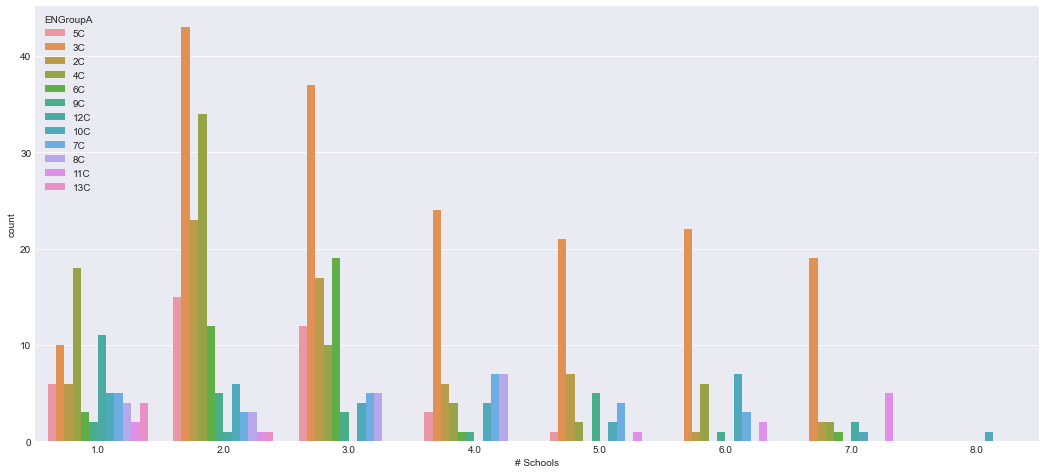

In [73]:
fig, ax_tip = plt.subplots(figsize = (18, 8))

ax_tip = sns.countplot(x = "# Schools", data = othercrimes, hue = "ENGroupA",saturation=0.75);

* Let's sort the values by Major N codes to see the relevance better.
* Use `sort_values()` for that purpose.

In [74]:
othercrimes=othercrimes.sort_values(by="Major N")
othercrimes

,# Schools,Major N,ENGroupA
1949,6.0,2.0,10C
258,2.0,2.0,4C
257,2.0,2.0,9C
216,4.0,2.0,7C
212,2.0,2.0,10C
...,...,...,...
534,4.0,6.0,3C
533,4.0,6.0,3C
532,3.0,6.0,10C
110,5.0,6.0,9C


* Great! To see the effects of Building Population and Number of Other Schools in the Building on Other Major Crimes, let's pivot it. We can pivot it by `pivot_table`function of pandas.
* Use `pivot_table` as follows:
    * For index, use `EnGroupA`,
    * For columns, use `# Schools`
    * For values, use `Major N`

In [75]:
pivot_table = othercrimes.pivot_table(index=['ENGroupA'], columns=['# Schools'], values='Major N') 
pivot_table

# Schools,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
ENGroupA,,,,,,,,
10C,2.200000,3.166667,4.500000,2.250000,2.000000,2.428571,5.000000,4.0
11C,2.000000,5.000000,NaN,NaN,4.000000,3.500000,3.200000,NaN
12C,2.818182,3.000000,NaN,NaN,NaN,NaN,3.500000,NaN
13C,2.750000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
2C,2.333333,2.304348,3.117647,4.500000,3.142857,3.000000,2.000000,NaN
3C,2.200000,2.418605,2.729730,3.666667,2.619048,3.454545,2.263158,NaN
4C,2.333333,2.470588,2.400000,3.000000,3.000000,3.666667,2.500000,NaN
5C,2.333333,2.266667,2.666667,2.666667,2.000000,NaN,NaN,NaN
6C,2.666667,2.416667,2.315789,2.000000,NaN,NaN,3.000000,NaN


We have Na values, again.. Replace them as we did earlier, with `bfill`and `ffill`parameters of `pd.fillna()`

In [76]:
pivot_table=pivot_table.fillna(method='ffill')
pivot_table=pivot_table.fillna(method='bfill')

Print the first 10 columns of `pivot_table` **df**.

In [77]:
pivot_table.isnull().values.any()
pivot_table.head()

# Schools,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
ENGroupA,,,,,,,,
10C,2.200000,3.166667,4.500000,2.25,2.000000,2.428571,5.0,4.0
11C,2.000000,5.000000,4.500000,2.25,4.000000,3.500000,3.2,4.0
12C,2.818182,3.000000,4.500000,2.25,4.000000,3.500000,3.5,4.0
13C,2.750000,3.000000,4.500000,2.25,4.000000,3.500000,3.5,4.0
2C,2.333333,2.304348,3.117647,4.50,3.142857,3.000000,2.0,4.0


Great ! In order to make smooother analysis, we'll only need 3 columns : <br>
`# Schools` : Number of schools in the building. We are going to need this column because different schools means different population categories such as age and culture. Different categories might be the major crimes in school. <br>
`EnGroupA`: Building population. <br>
`Major N`: Other major crimes.

* Evaluate your `pivot_table` df and final work with your own words.